In [1]:
# Momentan ist noch der folgende Code nötig, um auf die Module zugreifen zu können.
# Schön wäre, wenn das Programm in Zukunft über eine setup.py installiert werden könnte.
# (da könnte dann auch gleich grako mit installiert werden)
# In der Physik wäre das vielleicht mit virtualenv möglich
import sys
sys.path.append('../')
sys.path.append('../../')

%matplotlib inline

from errorpypagation import project
p = project.Project()

In [2]:
# Daten-Dateien sollten den Großteil der Messdaten und Berechnungen enthalten
p.load("data.dat")
# Richtig cool wäre natürlich, wenn man solchen Code auch direkt in Jupyter-Zellen schreiben könnte.
# Kann man irgendwie einen Zellentyp erstellen, der seinen Inhalt an eine Python-Funktion übergibt??

In [3]:
# Nun können wir die Ergebnisse auswerten.
p.table("t","h")
# Bei der Ausgabe der Table-Funktion wären Buttons für Latex-Code und reale Tabelle super.
# hier scheint der Fehler leider durch pytex von 0.1 auf 0.11 geändert worden zu sein.
# Außerdem bräuchte sie noch eine Einheitenwahl-Option.

\begin{table}[H]
\centering
	\begin{tabular}{|c|c|}
	\hline
	Zeit t [$s$] & Hoehe h [$m$]\\ \hline
	$0.00 \pm 0.11$ & $80.0 \phantom{0} \pm 0.5 \phantom{0}$\\ 
	$1.00 \pm 0.11$ & $79.00 \pm 0.30$\\ 
	$2.00 \pm 0.11$ & $76.0 \phantom{0} \pm 0.9 \phantom{0}$\\ 
	$3.00 \pm 0.11$ & $72.0 \phantom{0} \pm 0.6 \phantom{0}$\\ 
	$4.00 \pm 0.11$ & $65.0 \phantom{0} \pm 0.8 \phantom{0}$\\ 
	$5.00 \pm 0.11$ & $53.0 \phantom{0} \pm 0.5 \phantom{0}$\\ 
	$6.00 \pm 0.11$ & $37.00 \pm 0.30$\\ \hline
	\end{tabular}
\end{table}


<IPython.core.display.Latex object>

In [4]:
# Bisher lässt sich das nur mit prefUnit realisieren:
from errorpypagation import si
from errorpypagation.units import parse_unit
p.data["t"].value_prefUnit = parse_unit("ms",si.system)[2]
p.table("t","h")

\begin{table}[H]
\centering
	\begin{tabular}{|c|c|}
	\hline
	Zeit t [$ms$] & Hoehe h [$m$]\\ \hline
	$\phantom{000} 0 \pm 100$ & $80.0 \phantom{0} \pm 0.5 \phantom{0}$\\ 
	$1000 \pm 100$ & $79.00 \pm 0.30$\\ 
	$2000 \pm 100$ & $76.0 \phantom{0} \pm 0.9 \phantom{0}$\\ 
	$3000 \pm 100$ & $72.0 \phantom{0} \pm 0.6 \phantom{0}$\\ 
	$4000 \pm 100$ & $65.0 \phantom{0} \pm 0.8 \phantom{0}$\\ 
	$5000 \pm 100$ & $53.0 \phantom{0} \pm 0.5 \phantom{0}$\\ 
	$6000 \pm 100$ & $37.00 \pm 0.30$\\ \hline
	\end{tabular}
\end{table}


<IPython.core.display.Latex object>

In [5]:
# Unser Ergebnis für r lässt sich momentan in IPython
# nur durch die table-Funktion ausgeben. Hier wäre eine
# schöne Quantity-Ausgabe eines/aller Ergebnisse wünschenswert.
p.table("r")

\begin{table}[H]
\centering
	\begin{tabular}{|c|}
	\hline
	Abstand r [$km$]\\ \hline
	$(161 \pm 7) \times 10^{2}$\\ \hline
	\end{tabular}
\end{table}


<IPython.core.display.Latex object>

/home/lukas/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


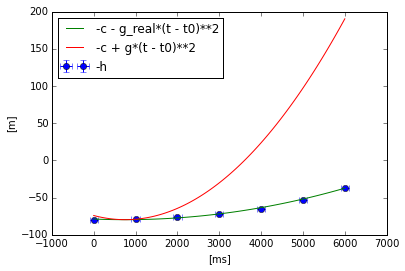

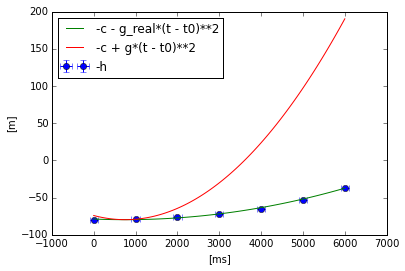

In [6]:
p.plot(["t","-h"],["t","-g_real * (t-t0)**2 - c"],["t","g * (t-t0)**2 - c"])
# An der Plot-Funktion lässt sich noch vieles (!) verbessern. Warum gibt er es zweimal aus??

In [7]:
# Mit der Formula-Funktion kann die Fehlerformel ausgegeben werden:
p.formula("r")
# Fehler werden mit einer "\sigma()"-Funktion ausgegeben.

'\\sigma{\\left (r \\right )} = \\sqrt{- \\frac{\\sigma^{2}{\\left (g_{real} \\right )}}{4 g_{real}^{3}} G M - \\frac{G \\sigma^{2}{\\left (M \\right )}}{4 M g_{real}} - \\frac{M \\sigma^{2}{\\left (G \\right )}}{4 G g_{real}}}'

In [ ]:
# p.assign und p.code sind tendenziell Funktionen,
# die nicht für den normalen produktiven Einsatz gedacht sind.
# Für p.code wäre eine formschönere Alternative gut.
# p.assign kann man nutzen, wenn man z.B. Ergebnisse eines
# eigenen Python-Skripts wieder ins System schieben will.

In [8]:
# p.save erzeugt den automatischen Output.
# Bisher besteht der aus einer csv-Datei mit den Ergebnissen.
# Wenn du eine richtig gute Ausgabe aller Ergebnisse in IPython
# hinbekommst, wäre das wohl nicht mehr notwendig.
# Angedacht ist noch eine Datei mit Fehlerformeln, um für schnelle
# Nutzung auch schnelle Ergebnisse zu liefern.
p.save()